In [1]:
import numpy as np
import pandas as pd

In [2]:
# Mount gdrive
from google.colab import drive, files
drive.mount('gdrive')

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


In [3]:
# Specify input file location
training_file = 'gdrive/My Drive/shopee/train.csv'
test_file = 'gdrive/My Drive/shopee/test.csv'
user_file = 'gdrive/My Drive/shopee/users.csv'

In [4]:
# Load dataset
training_data = pd.read_csv(training_file)
test_data = pd.read_csv(test_file)
user_data = pd.read_csv(user_file)

In [5]:
# Show some samples of training data
training_data.head()

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
0,4,2019-07-16 00:00:00+08:00,43,44,19,6,18,0,2,4,12,43,99,0,5,10,0,0
1,4,2019-07-16 00:00:00+08:00,102,44,9,4,8,2,9,17,18,48,90,1,1,4,1,1
2,6,2019-07-16 00:00:00+08:00,177,49,14,5,5,0,4,12,24,69,119,5,19,27,0,2
3,1,2019-07-16 00:00:00+08:00,184,49,49,9,53,0,0,1,9,23,69,1,3,6,0,3
4,6,2019-07-16 00:00:00+08:00,221,49,227,6,221,0,0,0,2,5,5,0,0,0,0,4


In [6]:
# Show more info about training data
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73539 entries, 0 to 73538
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country_code                 73539 non-null  int64 
 1   grass_date                   73539 non-null  object
 2   user_id                      73539 non-null  int64 
 3   subject_line_length          73539 non-null  int64 
 4   last_open_day                73539 non-null  object
 5   last_login_day               73539 non-null  object
 6   last_checkout_day            73539 non-null  object
 7   open_count_last_10_days      73539 non-null  int64 
 8   open_count_last_30_days      73539 non-null  int64 
 9   open_count_last_60_days      73539 non-null  int64 
 10  login_count_last_10_days     73539 non-null  int64 
 11  login_count_last_30_days     73539 non-null  int64 
 12  login_count_last_60_days     73539 non-null  int64 
 13  checkout_count_last_10_days  73

In [7]:
# Show some samples of test data
test_data.head()

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,row_id
0,6,2019-09-03 00:00:00+08:00,0,35,27,2,13,2,3,4,10,34,134,0,6,18,0
1,6,2019-09-03 00:00:00+08:00,130,35,7,5,383,1,1,1,5,5,5,0,0,0,1
2,5,2019-09-03 00:00:00+08:00,150,25,34,1,3,0,0,0,13,19,38,2,2,2,2
3,1,2019-09-03 00:00:00+08:00,181,36,63,5,5,0,0,0,43,110,173,2,5,5,3
4,5,2019-09-03 00:00:00+08:00,192,23,6,5,54,0,0,0,4,12,39,0,0,2,4


In [8]:
# Show more info about test data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55970 entries, 0 to 55969
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country_code                 55970 non-null  int64 
 1   grass_date                   55970 non-null  object
 2   user_id                      55970 non-null  int64 
 3   subject_line_length          55970 non-null  int64 
 4   last_open_day                55970 non-null  object
 5   last_login_day               55970 non-null  object
 6   last_checkout_day            55970 non-null  object
 7   open_count_last_10_days      55970 non-null  int64 
 8   open_count_last_30_days      55970 non-null  int64 
 9   open_count_last_60_days      55970 non-null  int64 
 10  login_count_last_10_days     55970 non-null  int64 
 11  login_count_last_30_days     55970 non-null  int64 
 12  login_count_last_60_days     55970 non-null  int64 
 13  checkout_count_last_10_days  55

In [9]:
# Show some samples of user data
user_data.head()

,user_id,attr_1,attr_2,attr_3,age,domain
0,0,NaN,1.0,0.0,NaN,@gmail.com
1,1,1.0,1.0,2.0,50.0,@gmail.com
2,2,NaN,1.0,0.0,NaN,other
3,3,NaN,1.0,0.0,NaN,@gmail.com
4,4,1.0,1.0,2.0,33.0,@gmail.com


In [10]:
# Show more info about user data
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127886 entries, 0 to 127885
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  127886 non-null  int64  
 1   attr_1   78987 non-null   float64
 2   attr_2   127439 non-null  float64
 3   attr_3   127886 non-null  float64
 4   age      78987 non-null   float64
 5   domain   127886 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 5.9+ MB


In [11]:
# Show class distribution
training_data.groupby('open_flag')['user_id'].count()

open_flag
0    62083
1    11456
Name: user_id, dtype: int64

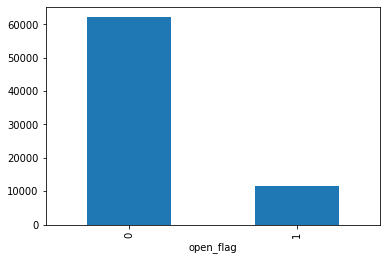

In [12]:
# Plot class distribution
training_data.groupby('open_flag')['user_id'].count().plot(kind='bar');

In [13]:
# Combine training and test data with user data
training_data = pd.merge(training_data, user_data, on='user_id', how='inner')
test_data = pd.merge(test_data, user_data, on='user_id', how='inner')

In [14]:
# Change column type in training data
training_data['country_code'] = training_data['country_code'].astype('str')
training_data['attr_3'] = training_data['attr_3'].astype('str')
training_data['grass_date'] = pd.to_datetime(
    training_data.grass_date, 
    format='%Y-%m-%d %H:%M:%S', 
    errors='coerce'
)

# Change column type in test data
test_data['country_code'] = test_data['country_code'].astype('str')
test_data['attr_3'] = test_data['attr_3'].astype('str')
test_data['grass_date'] = pd.to_datetime(
    test_data.grass_date, 
    format='%Y-%m-%d %H:%M:%S', 
    errors='coerce'
)

In [15]:
# Specify some interesting variables
variables = [
    'country_code',
    'subject_line_length', 
    'open_count_last_10_days',
    'open_count_last_30_days',
    'open_count_last_60_days',
    'login_count_last_10_days',
    'login_count_last_30_days',
    'login_count_last_60_days',
    'checkout_count_last_10_days',
    'checkout_count_last_30_days',
    'checkout_count_last_60_days',
    'open_flag'
]

In [16]:
# Take a subset of data using the selected variables
subset = training_data[variables]

In [17]:
# Encode the categorical variables
subset = pd.get_dummies(subset)

In [18]:
# Perform correlation analysis towards target variable
subset.corr()['open_flag']

subject_line_length           -0.057357
open_count_last_10_days        0.515307
open_count_last_30_days        0.507853
open_count_last_60_days        0.477766
login_count_last_10_days       0.014023
login_count_last_30_days       0.010134
login_count_last_60_days       0.008633
checkout_count_last_10_days    0.015573
checkout_count_last_30_days    0.013419
checkout_count_last_60_days    0.010231
open_flag                      1.000000
country_code_1                -0.163462
country_code_2                 0.047029
country_code_3                -0.032401
country_code_4                 0.163466
country_code_5                 0.046842
country_code_6                 0.039069
country_code_7                 0.044194
Name: open_flag, dtype: float64

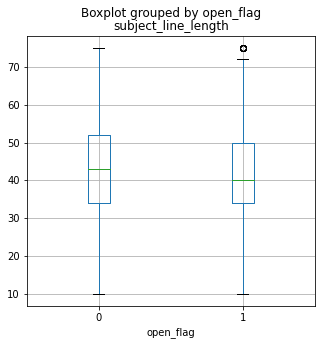

In [19]:
# Plot the subject_line_length data
training_data \
    .loc[:, ['subject_line_length', 'open_flag']] \
    .boxplot(column='subject_line_length', by='open_flag', figsize=(5, 5));

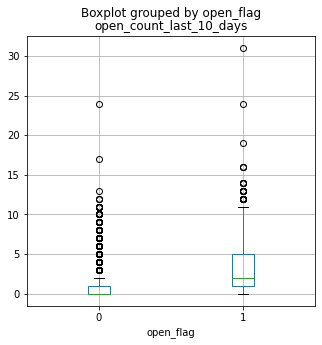

In [20]:
# Plot the open_count_last_10_days data
training_data \
    .loc[:, ['open_count_last_10_days', 'open_flag']] \
    .boxplot(column='open_count_last_10_days', by='open_flag', figsize=(5, 5));

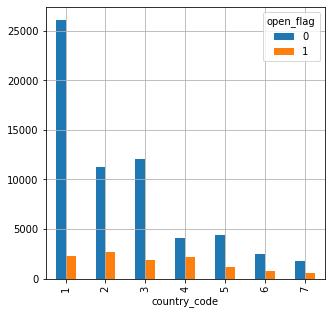

In [21]:
# Plot the country code data
training_data. \
    groupby(['country_code', 'open_flag'])['user_id'].count().reset_index(). \
    pivot(index='country_code', columns='open_flag', values='user_id'). \
    plot.bar(figsize=(5,5), grid=True);